In [1]:
#import h5py
#import galaxychop as gchop
#import uttr
#import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.offsetbox import AnchoredText
import numpy as np
import pickle

# Leo las galaxias

In [2]:
df_gal01 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal01.pkl')
df_gal02 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal02.pkl')
df_gal03 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal03.pkl')
df_gal04 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal04.pkl')
df_gal05 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal05.pkl')
df_gal06 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal06.pkl')
df_gal07 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal07.pkl')
df_gal08 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal08.pkl')
df_gal09 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal09.pkl')

m1=df_gal01.m.sum()
m2=df_gal02.m.sum()
m3=df_gal03.m.sum()
m4=df_gal04.m.sum()
m5=df_gal05.m.sum()
m6=df_gal06.m.sum()
m7=df_gal07.m.sum()
m8=df_gal08.m.sum()
m9=df_gal09.m.sum()

In [3]:
#Cambio labels Kmeans
df_gal04['label_KMeans'] = np.abs(df_gal04.label_KMeans-1)
df_gal05['label_KMeans'] = np.abs(df_gal05.label_KMeans-1)
df_gal06['label_KMeans'] = np.abs(df_gal06.label_KMeans-1)
df_gal09['label_KMeans'] = np.abs(df_gal09.label_KMeans-1)

#Cambio labels GMM
df_gal01['label_GaussianMixture'] = np.abs(df_gal01.label_GaussianMixture-1)
df_gal04['label_GaussianMixture'] = np.abs(df_gal04.label_GaussianMixture-1)
df_gal05['label_GaussianMixture'] = np.abs(df_gal05.label_GaussianMixture-1)
df_gal07['label_GaussianMixture'] = np.abs(df_gal07.label_GaussianMixture-1)
df_gal08['label_GaussianMixture'] = np.abs(df_gal08.label_GaussianMixture-1)
df_gal09['label_GaussianMixture'] = np.abs(df_gal09.label_GaussianMixture-1)

In [4]:
print(len(df_gal01))

6250


In [5]:
df_gal01.head(3)
df_gal01.keys()

Index(['m', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'label_JThreshold',
       'label_JHistogram', 'label_JEHistogram', 'label_KMeans',
       'label_GaussianMixture', 'probs0_GaussianMixture',
       'probs1_GaussianMixture', 'label_AutoGaussianMixture',
       'probs0_AutoGaussianMixture', 'probs1_AutoGaussianMixture',
       'probs2_AutoGaussianMixture', 'probs3_AutoGaussianMixture',
       'label_Agama'],
      dtype='object')

In [6]:
df_gal01.label_JHistogram.isna().sum()

87

In [7]:
dfs01 = df_gal01[df_gal01['label_JThreshold'].notna()]
print(len(dfs01.label_JThreshold))
print(dfs01.label_JHistogram)

6163
0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
6245    0.0
6246    0.0
6247    0.0
6248    0.0
6249    0.0
Name: label_JHistogram, Length: 6163, dtype: float64


## uso solo los labels no NaN

In [8]:
dfs01 = df_gal01[df_gal01['label_JThreshold'].notna()]
dfs02 = df_gal02[df_gal02['label_JThreshold'].notna()]
dfs03 = df_gal03[df_gal03['label_JThreshold'].notna()]
dfs04 = df_gal04[df_gal04['label_JThreshold'].notna()]
dfs05 = df_gal05[df_gal05['label_JThreshold'].notna()]
dfs06 = df_gal06[df_gal06['label_JThreshold'].notna()]
dfs07 = df_gal07[df_gal07['label_JThreshold'].notna()]
dfs08 = df_gal08[df_gal08['label_JThreshold'].notna()]
dfs09 = df_gal09[df_gal09['label_JThreshold'].notna()]

# Analisis Confusion Matrix (% Particulas)

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## AGAMA vs Threshold

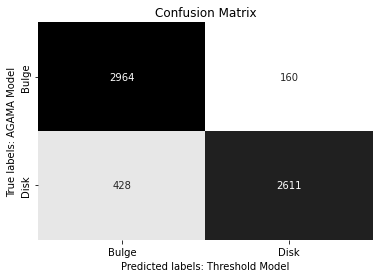

In [10]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs01.label_Agama
y_pred=dfs01.label_JThreshold   
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
sns.heatmap(cm,annot=True, cmap='binary', fmt='g', cbar=False, ax=ax)

#sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
#for t in ax.texts: t.set_text(t.get_text() + " %")

ax.set_ylabel('True labels: AGAMA Model');ax.set_xlabel('Predicted labels: Threshold Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

In [11]:
y_true=dfs01.label_Agama

In [12]:
print('Negative', len(dfs01.label_Agama[dfs01.label_Agama==0]))
print('Positive', len(dfs01.label_Agama[dfs01.label_Agama==1]))

Negative 3124
Positive 3039



 
|              |Predicted  |                       |
|--------------|-----------|-----------------------|
|Tot = P+N     | Predicted Positive      | Predicted Negative  |
|--------------|-----------|-----------------------|
| Positive (Ptot)    | True Positive (TP)      | False Negative (FN)  |
| Negative  (Ntot)   | False Positive (FP)     | True Negative (TN)   |
|--------------|-----------|-----------------------|


### Precision (Positive Predictive Value PPV)
PPV = TP / (TP + FP) 

The precision is intuitively the ability of the classifier not to label a negative sample as positive.

In [13]:
precision_score(y_true, y_pred)

0.9422591122338506

### Recall (True Positive Rate TPR)
TPR = TP / Ptot = TP / (TP + FN)

The recall is intuitively the ability of the classifier to find all the positive samples.

In [14]:
recall_score(y_true, y_pred)

0.8591641987495887

In [15]:
print(dfs04.label_KMeans[0])
print(dfs04.label_KMeans[35145])
ss=np.abs(dfs04.label_KMeans-1)
print(ss[0])
print(ss[35145])

1.0
0.0
0.0
1.0


# Tabla Precision

In [16]:
dfb = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans', 'GaussianMixture'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])

dfd = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans', 'GaussianMixture'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])
#------------------------------------------
def precision(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)        
    prec = precision_score(y_true, y_pred)
    return prec

def prec0(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
    
    prec_lab0=tn/(fn+tn)
    return prec_lab0
#------------------------------------------

gal = [dfs01,dfs02,dfs03,dfs04,dfs05,dfs06,dfs07,dfs08,dfs09]
model = ['label_JHistogram','label_JThreshold','label_JEHistogram','label_KMeans','label_GaussianMixture']


for idg,g in enumerate(gal):
    for idm, m in enumerate(model):

        y_true=g['label_Agama']
        #y_pred=dfs01[m]
        y_pred=g[m]
 
        dfd.iloc[idg,idm] = precision(y_true, y_pred) #--> label=1 (disk)
        dfb.iloc[idg,idm] = prec0(y_true, y_pred) #--> label=0 (bulge)
        #print('label bien',idg,idm, m)
        #print(precision(y_true, y_pred),prec0(y_true, y_pred))
        
pd.options.display.float_format = '{:,.3f}'.format

df_prec_bulge = dfb
df_prec_disk = dfd

In [17]:
df_prec_bulge

,JHistogram,JThreshold,JEHistogram,KMeans,GaussianMixture
Agama01,0.872,0.874,0.884,0.938,0.797
Agama02,0.864,0.867,0.873,0.936,0.812
Agama03,0.953,0.983,0.984,0.993,0.933
Agama04,0.949,0.976,0.976,0.990,0.933
Agama05,0.967,0.991,0.986,0.996,0.958
Agama06,0.971,0.989,0.974,0.995,0.948
Agama07,0.928,0.945,0.968,0.986,0.936
Agama08,0.958,0.976,0.975,0.995,0.958
Agama09,0.972,0.987,0.988,0.998,0.980


# Tabla ReCall

In [18]:
dfb = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans', 'GaussianMixture'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])
dfd = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans', 'GaussianMixture'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])
#------------------------------------------
#def recall(y_true,y_pred):
#    cm = confusion_matrix(y_true, y_pred)        
#    rec = recall_score(y_true, y_pred)
#    return rec

#def rec0(y_true,y_pred):
#    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
#    
#    rec_lab0=tn/(fp+tn)
#    return rec_lab0

# Completitud Modificada
def rec1(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()        
    rec = (tp + fp)/(tp + fn)
    return rec

def rec0(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
    
    rec_lab0 = (tn + fn)/(fp+tn)
    return rec_lab0

#------------------------------------------

gal = [dfs01,dfs02,dfs03,dfs04,dfs05,dfs06,dfs07,dfs08,dfs09]
model = ['label_JHistogram','label_JThreshold','label_JEHistogram','label_KMeans', 'label_GaussianMixture']


for idg,g in enumerate(gal):
    for idm, m in enumerate(model):
        
        y_true=g['label_Agama']
        #y_pred=dfs01[m]
        y_pred=g[m]
        
        #df.iloc[idg,idm] = recall(y_true, y_pred) #bulge
        dfd.iloc[idg,idm] = rec1(y_true, y_pred) #bulge
        dfb.iloc[idg,idm] = rec0(y_true, y_pred) #disk
        #print(idg,idm, m)

        

pd.options.display.float_format = '{:,.3f}'.format

df_rec_bulge = dfb
df_rec_disk = dfd

        JHistogram JThreshold JEHistogram KMeans GaussianMixture
Agama01      0.872      0.874       0.884  0.938           0.797
Agama02      0.864      0.867       0.873  0.936           0.812
Agama03      0.953      0.983       0.984  0.993           0.933
Agama04      0.949      0.976       0.976  0.990           0.933
Agama05      0.967      0.991       0.986  0.996           0.958
Agama06      0.971      0.989       0.974  0.995           0.948
Agama07      0.928      0.945       0.968  0.986           0.936
Agama08      0.958      0.976       0.975  0.995           0.958
Agama09      0.972      0.987       0.988  0.998           0.980


Text(0.5, 1.0, 'Precision')

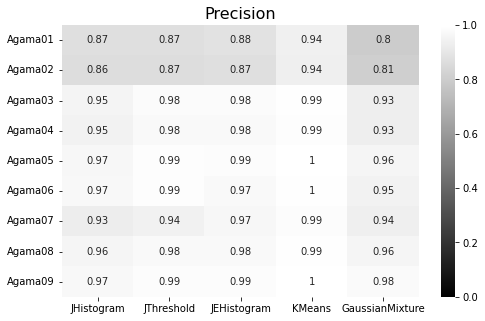

In [19]:
print(df_prec_bulge)
df_prec_bulge= df_prec_bulge[df_rec_bulge.columns].astype(float)
plt.figure(figsize=(8,5))
sns.heatmap(df_prec_bulge, annot=True, vmin=0, vmax=1, center=0.5, cmap='gray')
plt.title('Precision', fontsize=16)
#plt.savefig('gchop_plots/heatmap_precision.png', dpi=200)

        JHistogram JThreshold JEHistogram KMeans GaussianMixture
Agama01      0.996      1.086       0.975  0.912           1.241
Agama02      1.015      1.099       0.995  0.855           1.209
Agama03      0.985      0.965       0.963  0.895           1.071
Agama04      0.991      0.971       0.976  0.850           1.070
Agama05      0.991      0.960       0.976  0.846           1.043
Agama06      0.997      0.968       0.986  0.826           1.051
Agama07      1.004      1.015       0.990  0.730           1.058
Agama08      1.003      0.982       0.992  0.708           1.038
Agama09      1.001      0.971       0.993  0.660           1.015


Text(0.5, 1.0, 'Recall')

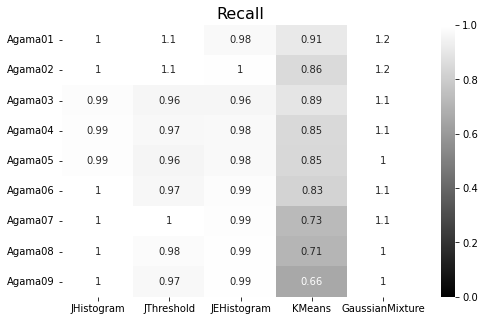

In [20]:
print(df_rec_bulge)
df_rec_bulge= df_rec_bulge[df_rec_bulge.columns].astype(float)

plt.figure(figsize=(8,5))
sns.heatmap(df_rec_bulge, annot=True, vmin=0, vmax=1, center=0.5, cmap='gray')
plt.title('Recall', fontsize=16)

#plt.savefig('gchop_plots/heatmap_recall.png', dpi=200)

In [21]:
df_rec_bulge

,JHistogram,JThreshold,JEHistogram,KMeans,GaussianMixture
Agama01,0.996,1.086,0.975,0.912,1.241
Agama02,1.015,1.099,0.995,0.855,1.209
Agama03,0.985,0.965,0.963,0.895,1.071
Agama04,0.991,0.971,0.976,0.850,1.070
Agama05,0.991,0.960,0.976,0.846,1.043
Agama06,0.997,0.968,0.986,0.826,1.051
Agama07,1.004,1.015,0.990,0.730,1.058
Agama08,1.003,0.982,0.992,0.708,1.038
Agama09,1.001,0.971,0.993,0.660,1.015


# Plots

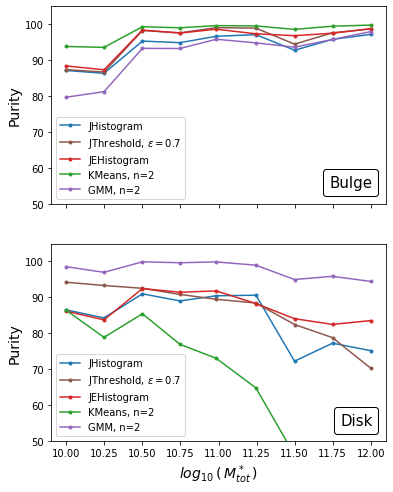

In [24]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(6,8))

gal = np.array([1,2,3,4,5,6,7,8,9])
gal = np.log10(np.array([m1,m2,m3,m4,m5,m6,m7,m8,m9]))

JH = df_prec_bulge.iloc[:,0]*100.
JT = df_prec_bulge.iloc[:,1]*100.
JE = df_prec_bulge.iloc[:,2]*100.
KM = df_prec_bulge.iloc[:,3]*100.
GMM = df_prec_bulge.iloc[:,4]*100.

ax1.plot(gal,JH,'.-',label='JHistogram', color='C0')
ax1.plot(gal,JT,'.-',label='JThreshold, $\epsilon=0.7$', color='C5')
ax1.plot(gal,JE,'.-',label='JEHistogram', color='C3')
ax1.plot(gal,KM,'.-',label='KMeans, n=2', color='C2')
ax1.plot(gal,GMM,'.-',label='GMM, n=2', color='C4')

ax1.set_ylim(50,105)
ax1.set_ylabel('Purity', fontsize=14)
ax2.set_xlabel(r'$log_{10}\,(\,M^*_{tot}\,)$', fontsize=14)
ax1.legend()

at = AnchoredText("Bulge", prop=dict(size=15), frameon=True, loc='lower right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)

#--------------------------------
JH = df_prec_disk.iloc[:,0]*100.
JT = df_prec_disk.iloc[:,1]*100.
JE = df_prec_disk.iloc[:,2]*100.
KM = df_prec_disk.iloc[:,3]*100.
GMM = df_prec_disk.iloc[:,4]*100.
#C1:AGMM
ax2.plot(gal,JH,'.-',label='JHistogram', color='C0')
ax2.plot(gal,JT,'.-',label='JThreshold, $\epsilon=0.7$', color='C5')
ax2.plot(gal,JE,'.-',label='JEHistogram', color='C3')
ax2.plot(gal,KM,'.-',label='KMeans, n=2', color='C2')
ax2.plot(gal,GMM,'.-',label='GMM, n=2', color='C4')
ax2.set_ylim(50,105)
ax2.set_ylabel('Purity', fontsize=14)
ax2.set_xlabel(r'$log_{10}\,(\,M^*_{tot}\,)$', fontsize=14)
ax2.legend()

at = AnchoredText("Disk", prop=dict(size=15), frameon=True, loc='lower right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)
#plt.savefig('purity.png')

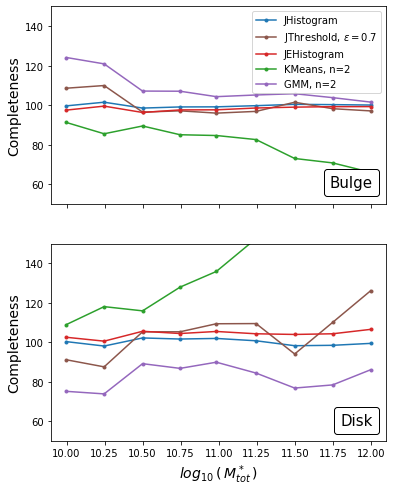

In [25]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(6,8))

gal = np.array([1,2,3,4,5,6,7,8,9])
gal = np.log10(np.array([m1,m2,m3,m4,m5,m6,m7,m8,m9]))


JH = df_rec_bulge.iloc[:,0]*100.
JT = df_rec_bulge.iloc[:,1]*100.
JE = df_rec_bulge.iloc[:,2]*100.
KM = df_rec_bulge.iloc[:,3]*100.
GMM = df_rec_bulge.iloc[:,4]*100.

ax1.plot(gal,JH,'.-',label='JHistogram', color='C0')
ax1.plot(gal,JT,'.-',label='JThreshold, $\epsilon=0.7$', color='C5')
ax1.plot(gal,JE,'.-',label='JEHistogram', color='C3')
ax1.plot(gal,KM,'.-',label='KMeans, n=2', color='C2')
ax1.plot(gal,GMM,'.-',label='GMM, n=2', color='C4')

ax1.set_ylim(50,150)
ax1.set_ylabel('Completeness', fontsize=14)
ax1.legend()

at = AnchoredText("Bulge", prop=dict(size=15), frameon=True, loc='lower right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)


#--------------------------------
JH = df_rec_disk.iloc[:,0]*100.
JT = df_rec_disk.iloc[:,1]*100.
JE = df_rec_disk.iloc[:,2]*100.
KM = df_rec_disk.iloc[:,3]*100.
GMM = df_rec_disk.iloc[:,4]*100.

ax2.plot(gal,JH,'.-',label='JHistogram', color='C0')
ax2.plot(gal,JT,'.-',label='JThreshold, $\epsilon=0.7$', color='C5')
ax2.plot(gal,JE,'.-',label='JEHistogram', color='C3')
ax2.plot(gal,KM,'.-',label='KMeans, n=2', color='C2')
ax2.plot(gal,GMM,'.-',label='GMM, n=2', color='C4')

ax2.set_ylim(50,150)
ax2.set_xlabel(r'$log_{10}\,(\,M^*_{tot}\,)$', fontsize=14)
ax2.set_ylabel('Completeness', fontsize=14)
#ax2.legend()

at = AnchoredText("Disk", prop=dict(size=15), frameon=True, loc='lower right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)
#plt.savefig('completeness.png')